In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
adata = sc.read_h5ad(r"C:\Users\evanlee\Documents\Research_datasets\PBMC_Hao\GSE164378_Hao\Harmony_and_ztrans\Hao_Harmony_test_no_scale.h5ad")
print('Original adata:', adata.shape)
adata.obs['celltype.l2'] = adata.obs['celltype.l2'].str.replace(' ', '_')
label = adata.obs['celltype.l2'].tolist()
types = np.unique(label).tolist()
print('all cell types:', types)
print('====================')
# del adata


Original adata: (161764, 33538)
all cell types: ['ASDC', 'B_intermediate', 'B_memory', 'B_naive', 'CD14_Mono', 'CD16_Mono', 'CD4_CTL', 'CD4_Naive', 'CD4_Proliferating', 'CD4_TCM', 'CD4_TEM', 'CD8_Naive', 'CD8_Proliferating', 'CD8_TCM', 'CD8_TEM', 'Doublet', 'Eryth', 'HSPC', 'ILC', 'MAIT', 'NK', 'NK_CD56bright', 'NK_Proliferating', 'Plasmablast', 'Platelet', 'Treg', 'cDC1', 'cDC2', 'dnT', 'gdT', 'pDC']


## Read features

In [3]:
import os
os.chdir(r"C:\Users\evanlee\Documents\GitHub\EvanPys\Progress\PBMC_Hao_ztrans_v2\Level2\feature_selection")

features_dict = {}
# Read features for each celltype
for celltype in types:
    try:
        feature_df = pd.read_csv(f'{celltype}_features.txt', names=['Gene', 'Weight', 'Tendency'], sep='\t')
        features_dict[celltype] = feature_df
    except:
        print('skipping:', celltype)
        continue
    # print(celltype, 'Feature count:', feature_df.shape[0])
    # print(celltype, 'Positive feature count:', feature_df[feature_df['Tendency'] == 1].shape[0])
    # print('------------------')

In [4]:
count_df = pd.DataFrame(columns=['Feature_count', 'Positive_feature_count'])
for celltype in features_dict.keys():
    feature_df = features_dict[celltype]
    feature_count = feature_df.shape[0]
    positive_count = feature_df[feature_df['Tendency'] == 1].shape[0]
    count_df.loc[celltype] = [feature_count, positive_count]
count_df

,Feature_count,Positive_feature_count
ASDC,119,61
B_intermediate,107,68
B_memory,1708,793
B_naive,30,23
CD14_Mono,18,14
CD16_Mono,1149,705
CD4_CTL,729,356
CD4_Naive,63,32
CD4_Proliferating,205,147
CD4_TCM,155,95


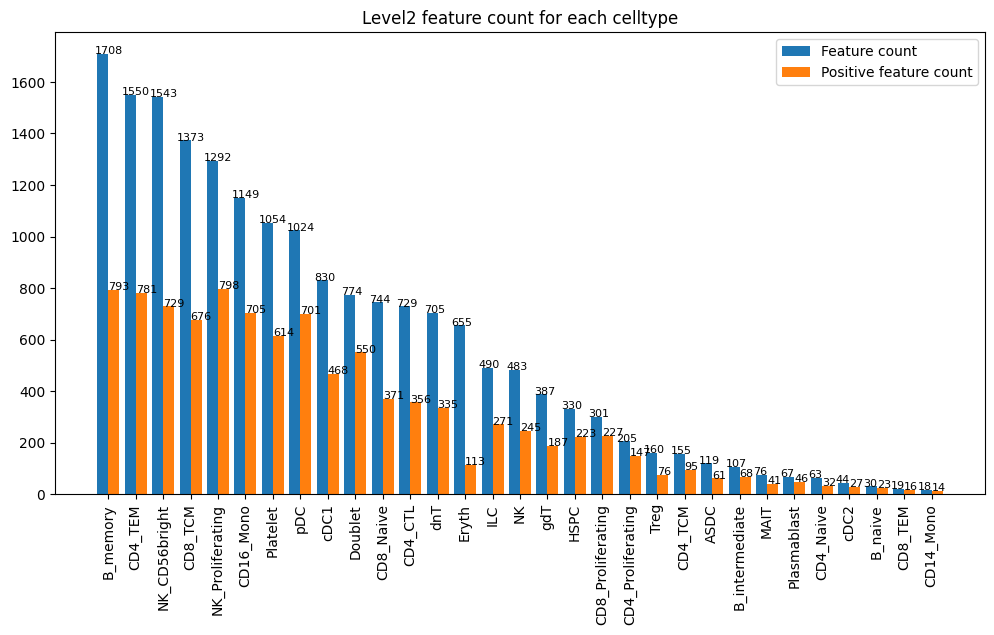

In [6]:
# Sort count_df by 'Feature_count' in descending order
count_df = count_df.sort_values('Feature_count', ascending=False)

# plot barplot
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(count_df.index))
bar_width = 0.4

ax.bar(x - bar_width/2, count_df['Feature_count'], bar_width, label='Feature count')
ax.bar(x + bar_width/2, count_df['Positive_feature_count'], bar_width, label='Positive feature count')

# Add the values to each bar
for i, v in enumerate(count_df['Feature_count']):
    plt.text(i-0.5, v, str(v), fontsize=8)
for i, v in enumerate(count_df['Positive_feature_count']):
    plt.text(i, v, str(v), fontsize=8)

ax.set_xticks(x)
ax.set_xticklabels(count_df.index)
plt.xticks(rotation=90)
plt.title('Level2 feature count for each celltype')
ax.legend()
# plt.savefig('L2_feature_count.png', dpi=300, bbox_inches='tight')
plt.show()

## Plot cell number

In [7]:
counts = adata.obs['celltype.l2'].value_counts()
order = count_df.index.tolist()
counts = counts[order]
counts

celltype.l2
B_memory              3285
CD4_TEM               4282
NK_CD56bright          943
CD8_TCM               2883
NK_Proliferating       548
CD16_Mono             6320
Platelet              2293
pDC                    861
cDC1                   151
Doublet                605
CD8_Naive            10768
CD4_CTL               1736
dnT                    356
Eryth                   83
ILC                    132
NK                   17173
gdT                   3649
HSPC                   329
CD8_Proliferating       91
CD4_Proliferating      108
Treg                  2507
CD4_TCM              14889
ASDC                    76
B_intermediate        2431
MAIT                  2784
Plasmablast            366
CD4_Naive            17479
cDC2                  2501
B_naive               7718
CD8_TEM              11727
CD14_Mono            42690
Name: count, dtype: int64

In [8]:
sum(counts)

161764

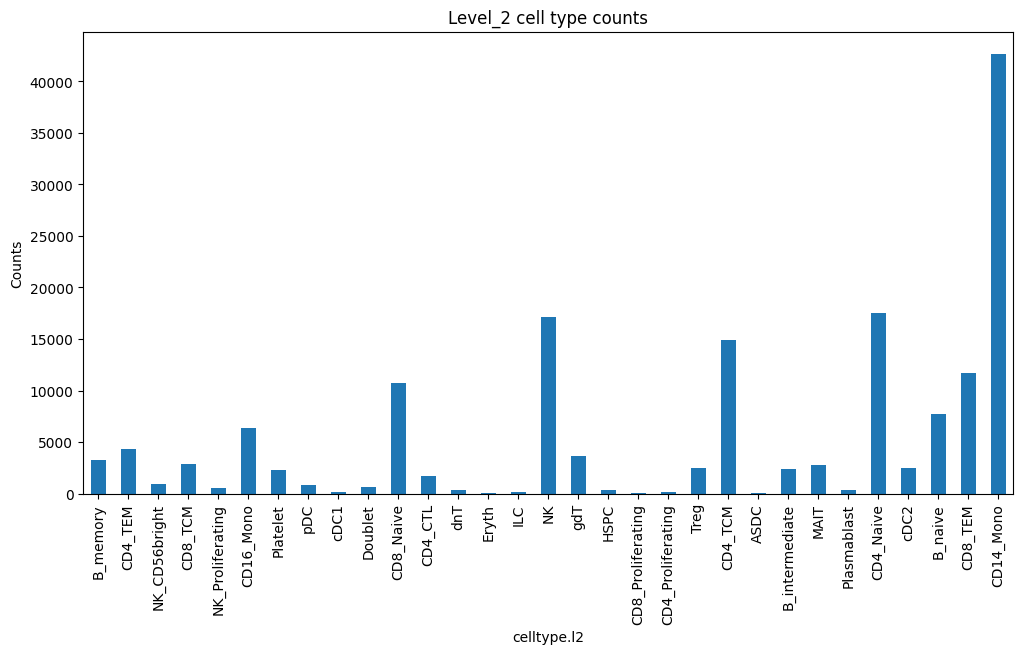

In [9]:
plt.figure(figsize=(12, 6))
counts.plot(kind='bar')
plt.title('Level_2 cell type counts')
plt.ylabel('Counts')
plt.show()